In [1]:
#필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\one\AppData\Local\Temp\ipykernel_820\1643305544.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
data = pd.read_csv('C:/Users/one/Desktop/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#결측치 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'number6')

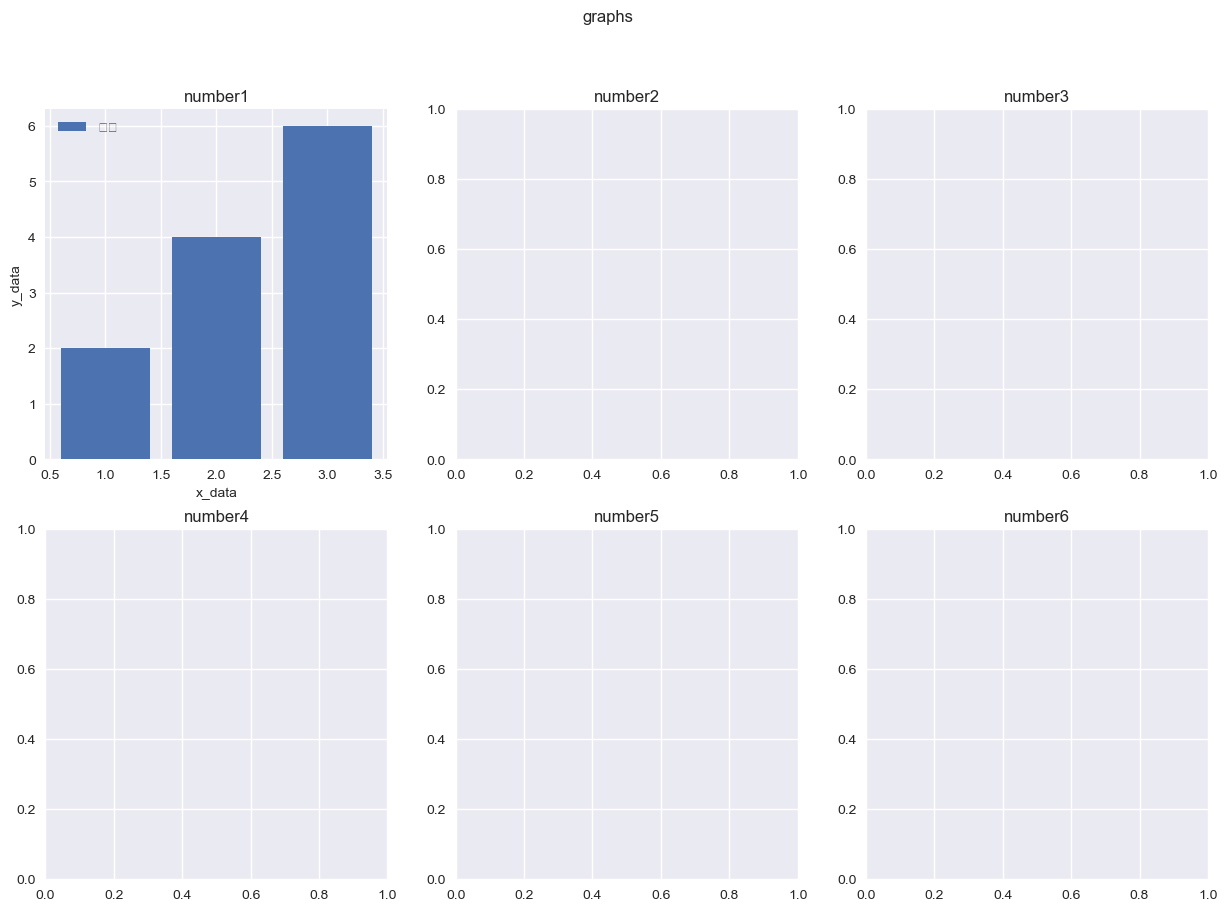

In [25]:
# 데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

x= [1,2,3]
y= [2,4,6]
fig, ax = plt.subplots(2,3,figsize=(15,10))
fig.suptitle('graphs')

ax[0,0].bar(x,y,label = "수치")
ax[0,0].set_title('number1')
ax[0,0].legend()
ax[0,0].set(xlabel = "x_data", ylabel = "y_data")

#두번째그래프
ax[0,1].set_title('number2')

#세번째그래프
ax[0,2].set_title('number3')

#네번째그래프
ax[1,0].set_title('number4')

#다섯번째그래프
ax[1,1].set_title('number5')

#여섯번째그래프
ax[1,2].set_title('number6')

<Figure size 800x550 with 0 Axes>

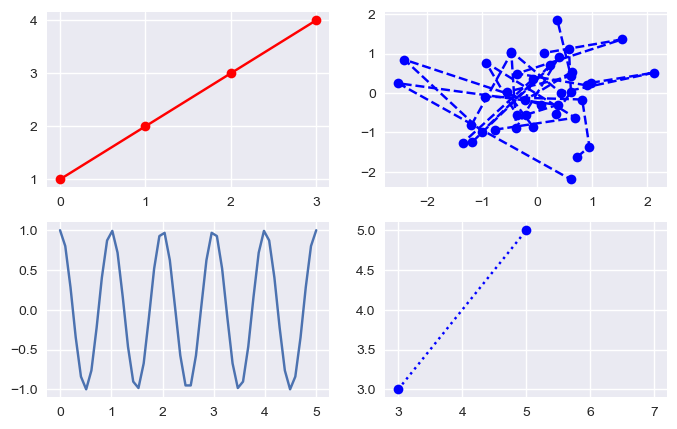

In [26]:
fig = plt.figure()
fig.suptitle('figure sample plots')
fig, ax_lst = plt.subplots(2,2,figsize=(8,5))
ax_lst[0][0].plot([1,2,3,4], 'ro-')
ax_lst[0][1].plot(np.random.randn(4, 10), np.random.randn(4,10), 'bo--')
ax_lst[1][0].plot(np.linspace(0.0, 5.0), np.cos(2 * np.pi * np.linspace(0.0, 5.0)))
ax_lst[1][1].plot([3,5], [3,5], 'bo:')
ax_lst[1][1].plot([3,7], [5,4], 'kx')
plt.show()

In [27]:
#그래프 서식 설정하기

parameters = {
    'axes.titlesize': 25,
    'axes.labelsize': 20,
    'ytick.labelsize': 20
}
plt.rcParams.update(parameters)

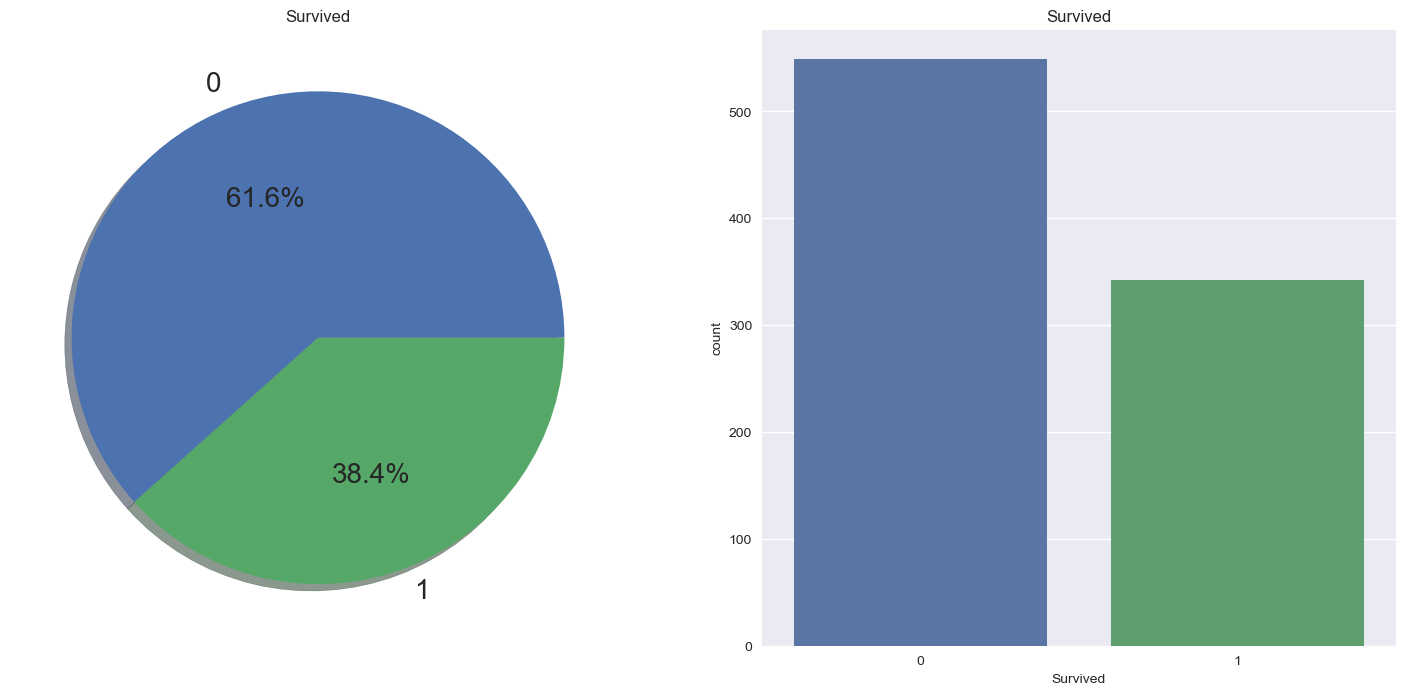

In [7]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
data["Survived"].value_counts().plot.pie(autopct = "%1.1f%%", ax = ax[0],shadow = True, fontsize = 20)
ax[0].set_title("Survived")
ax[0].set_ylabel("")

sns.countplot(x="Survived", data =data, ax=ax[1])
ax[1].set_title("Survived")
plt.show()

# 성별 & 생존자 수

In [37]:
data.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

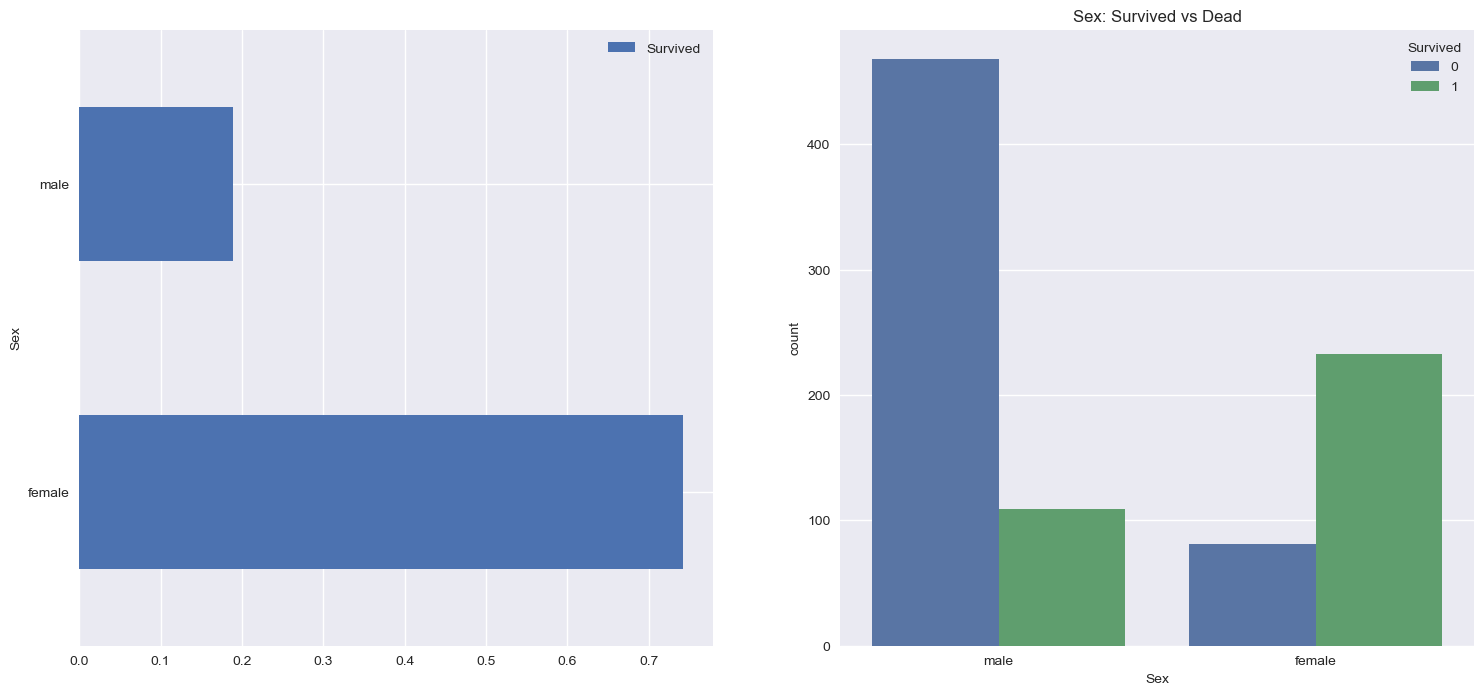

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data[["Sex", "Survived"]].groupby(["Sex"]).mean().plot.barh(ax=ax[0])

sns.countplot(x ='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

#  Pclass와의 관계

In [10]:
pd.crosstab(data.Pclass,data.Survived,margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


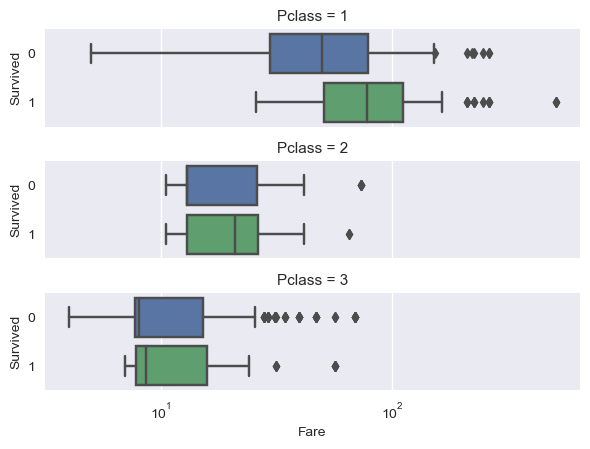

In [21]:
plot = sns.catplot(x="Fare", y="Survived", row="Pclass",
                kind="box", orient="h", height=1.5, aspect =4,
                data=data.query("Fare > 0")) ## 요금이 0초과인 데이터만
plot.set(xscale="log"); 

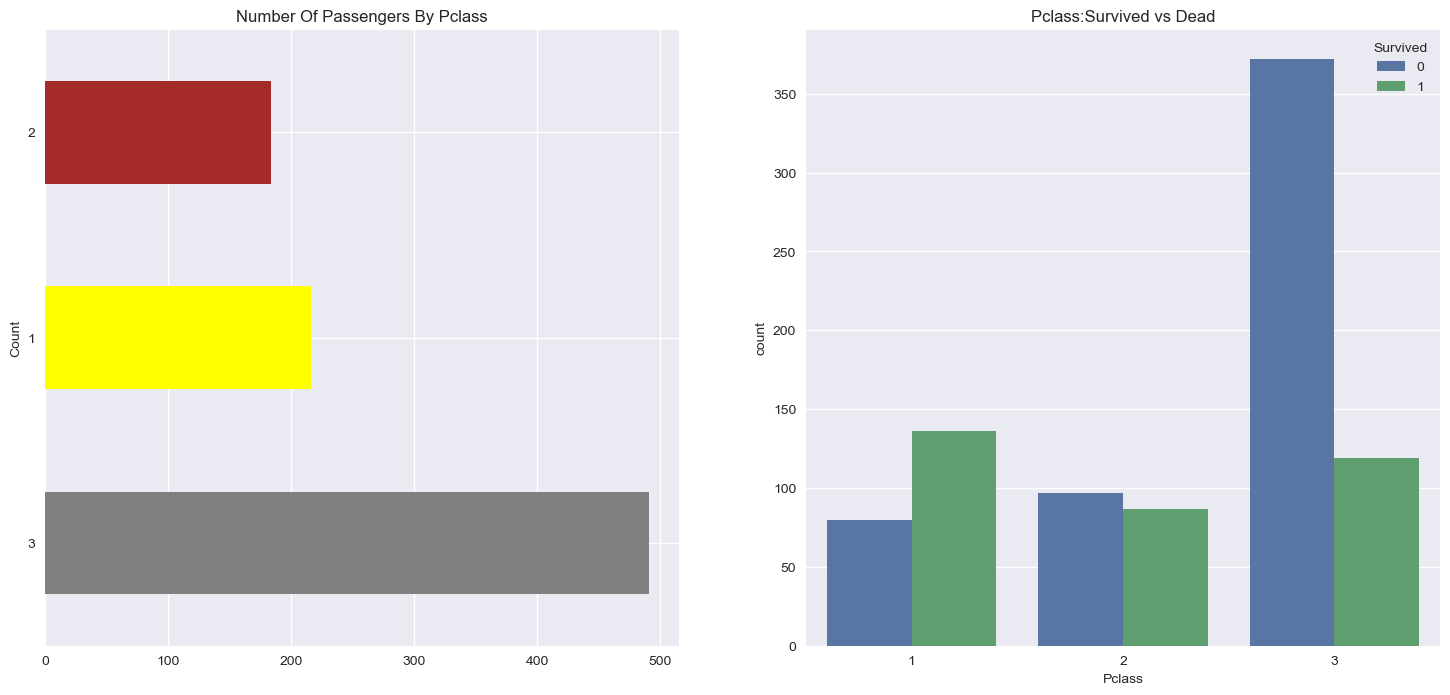

In [23]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data["Pclass"].value_counts().plot.barh(ax = ax[0], color = ["gray","yellow","brown"])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x= "Pclass", data = data , hue = "Survived",ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [25]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins = True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

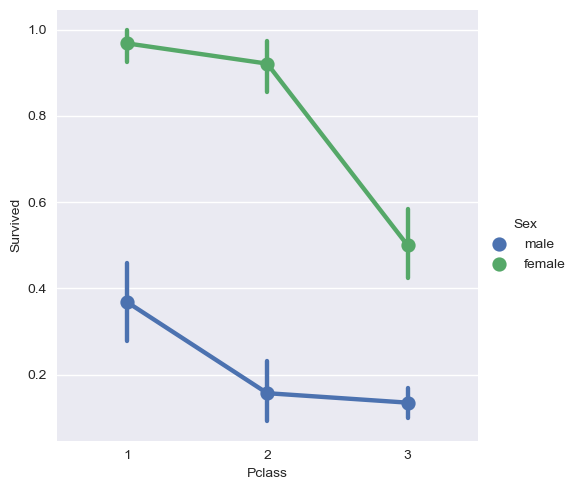

In [26]:
sns.catplot(data=data,x= 'Pclass',y = 'Survived', kind ="point",hue='Sex') ## sex별로 pclass의 변화에 따른 survived 변화
plt.show()

#  Age와의 관계

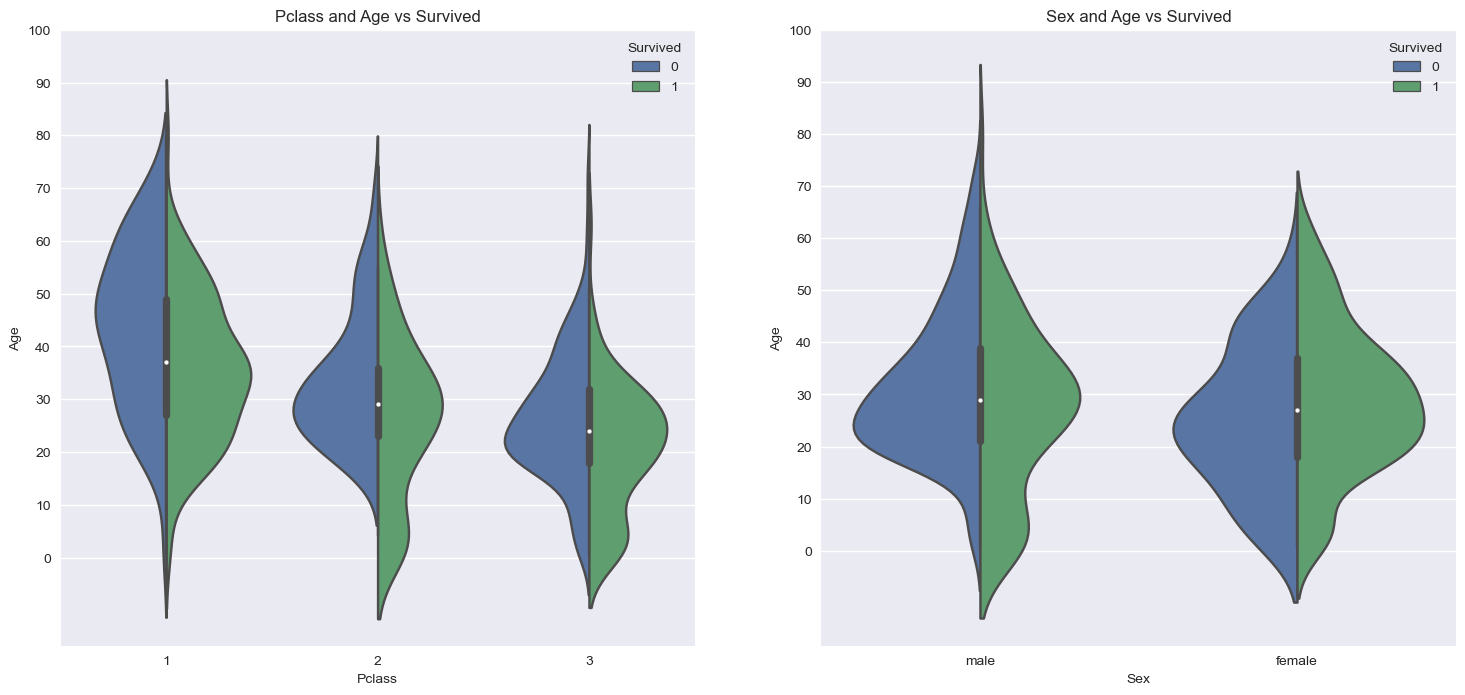

In [29]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot(x="Pclass",y="Age",hue="Survived",data=data,split = True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [30]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [31]:
pd.crosstab(data.Sex, data.Initial)

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [32]:
data['Initial'].replace([
    'Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col',
    'Rev', 'Capt', 'Sir', 'Don'
], [
    'Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other',
    'Other', 'Mr', 'Mr', 'Mr'
],
                        inplace=True)

In [34]:
data.groupby(['Initial'])['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [35]:
# 결측값을 Initial별 평균값으로 대체
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age'] = 46

In [37]:
data.Age.isnull().any()

False

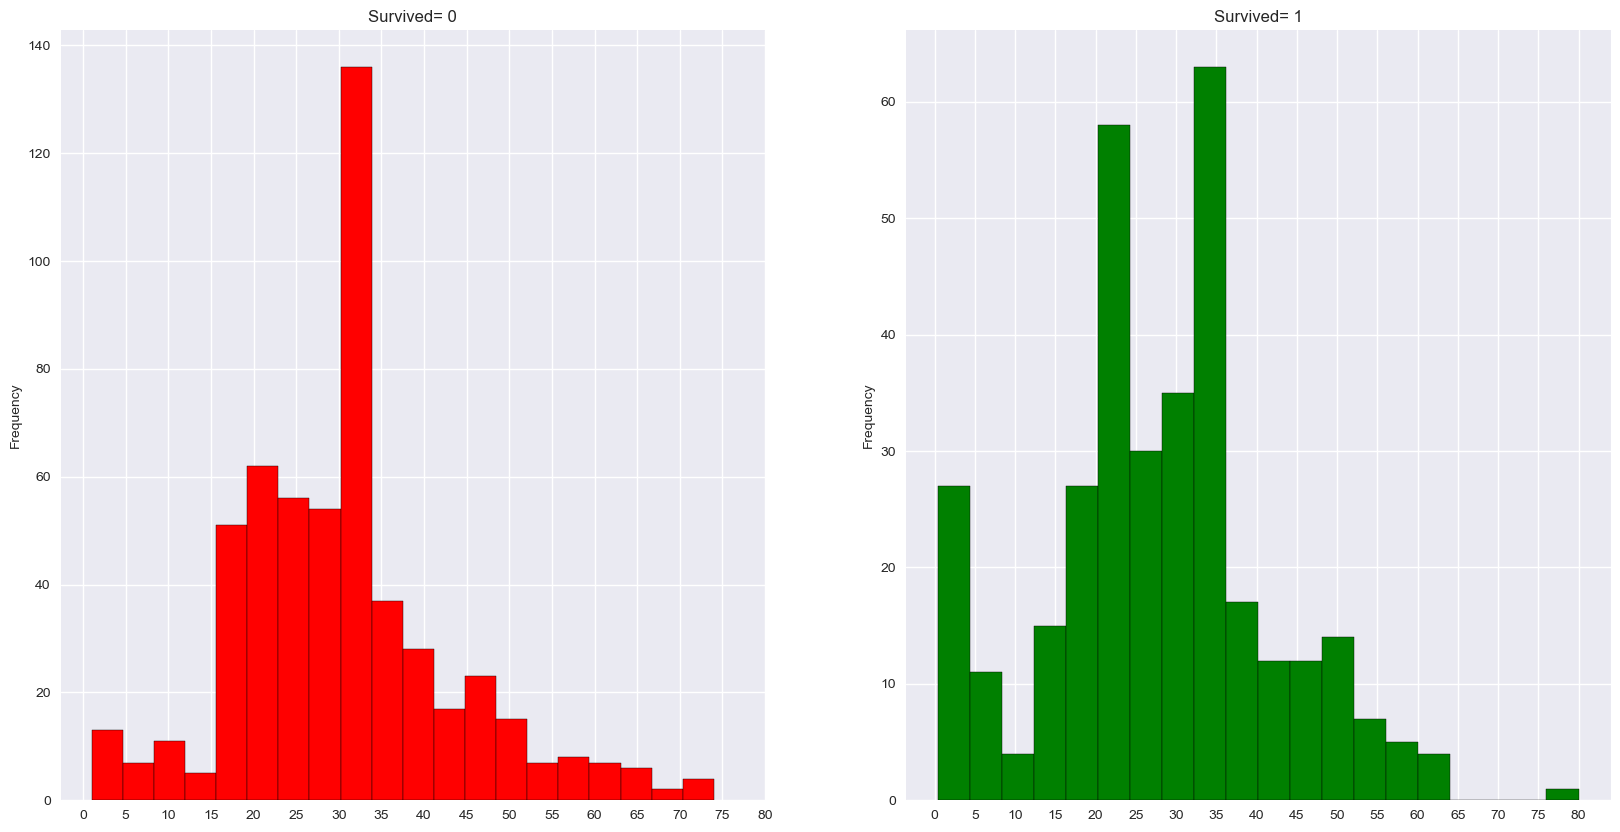

In [41]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

data[data["Survived"]==0].Age.plot.hist(ax=ax[0], bins =20, edgecolor = 'black',color ='red')
ax[0].set_title('Survived= 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)


data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], bins=20,edgecolor = 'black',color ='green')
ax[1].set_title('Survived= 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

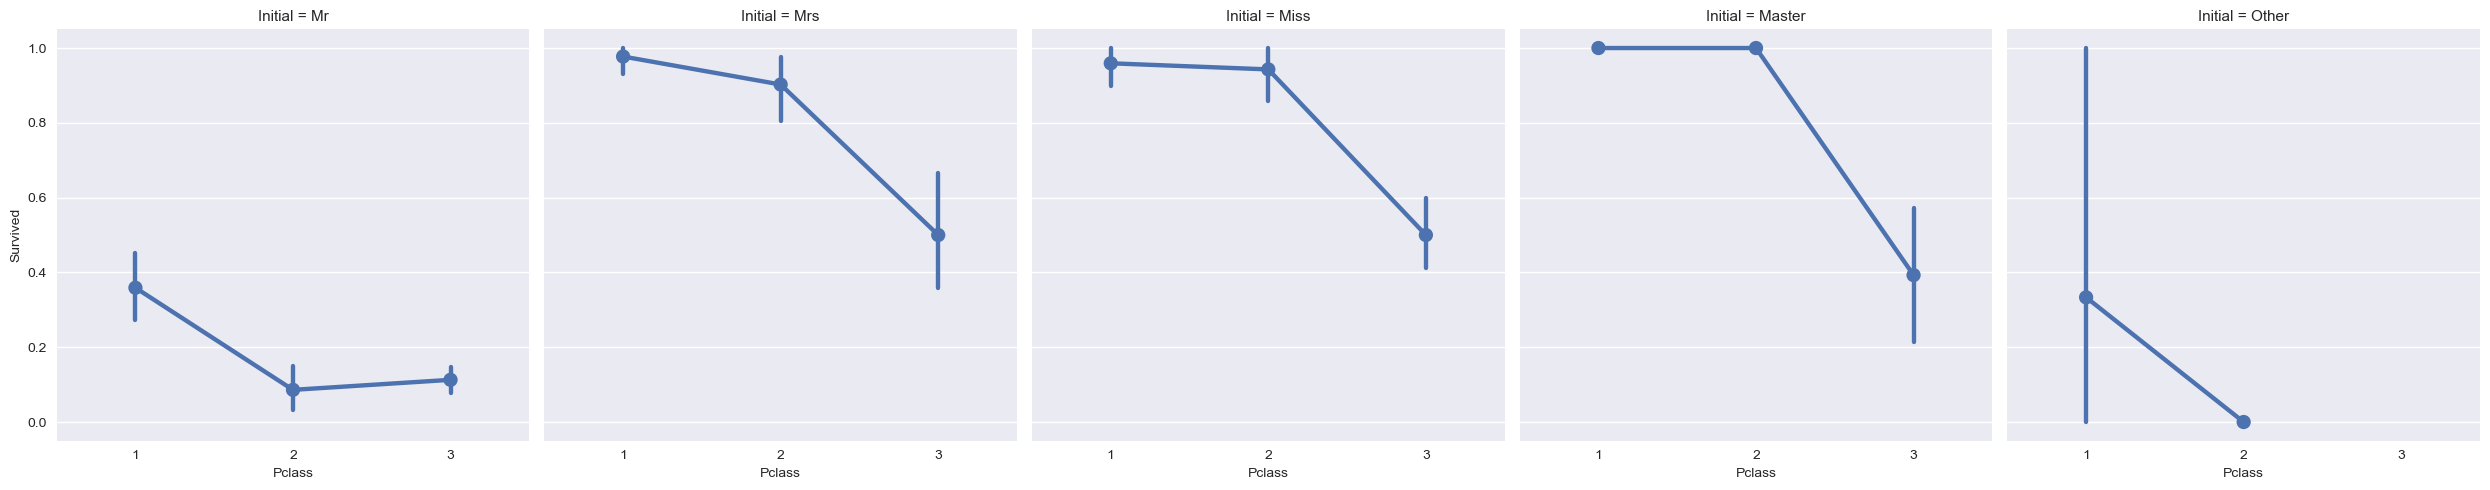

In [42]:
sns.catplot(x="Pclass", y="Survived", col = "Initial",data = data, kind = "point")
plt.show()

In [43]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived],
            margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

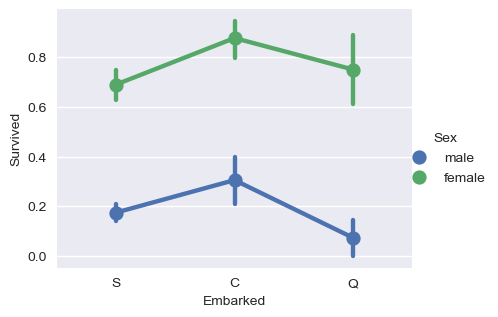

In [44]:
sns.catplot(x = 'Embarked', y= 'Survived',kind = 'point', hue= 'Sex', data=data) 
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

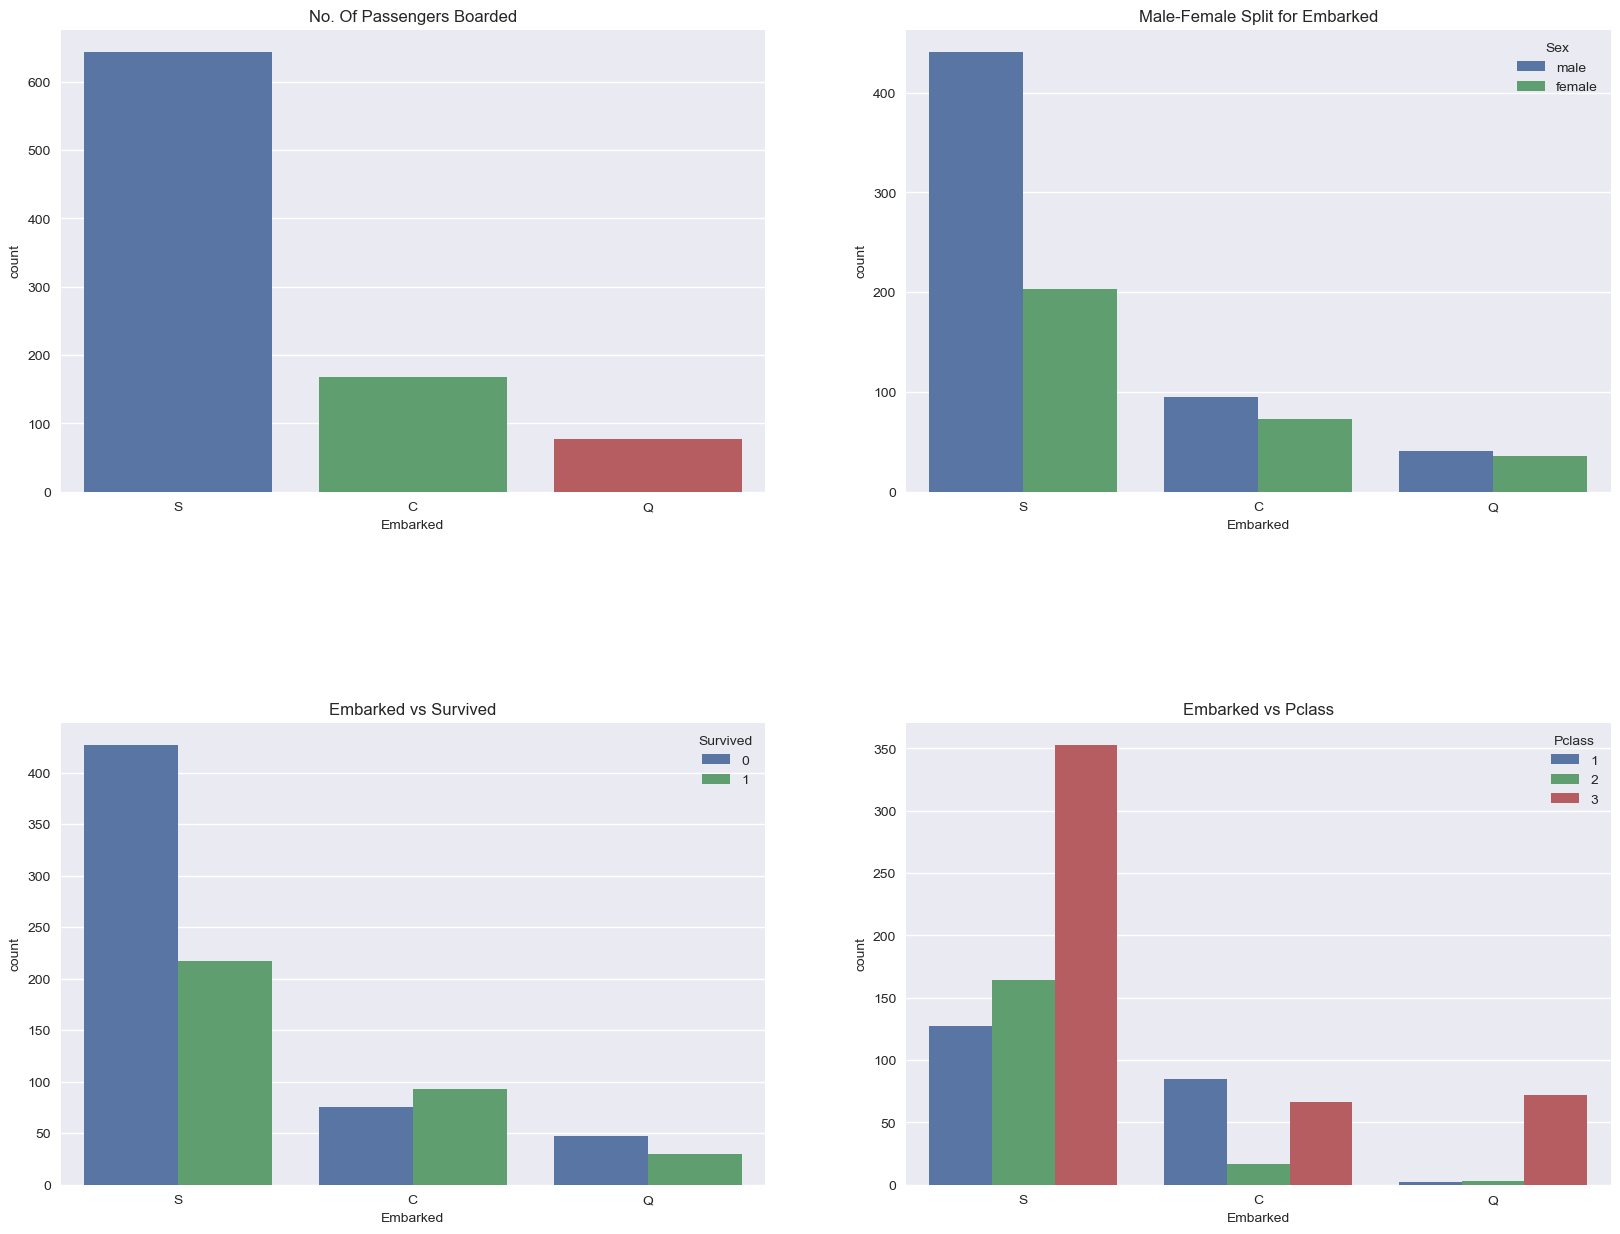

In [45]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot(x= "Embarked", data=data,ax=ax[0,0])
ax[0, 0].set_title('No. Of Passengers Boarded')

sns.countplot(x = 'Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot(x = 'Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot(x = 'Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

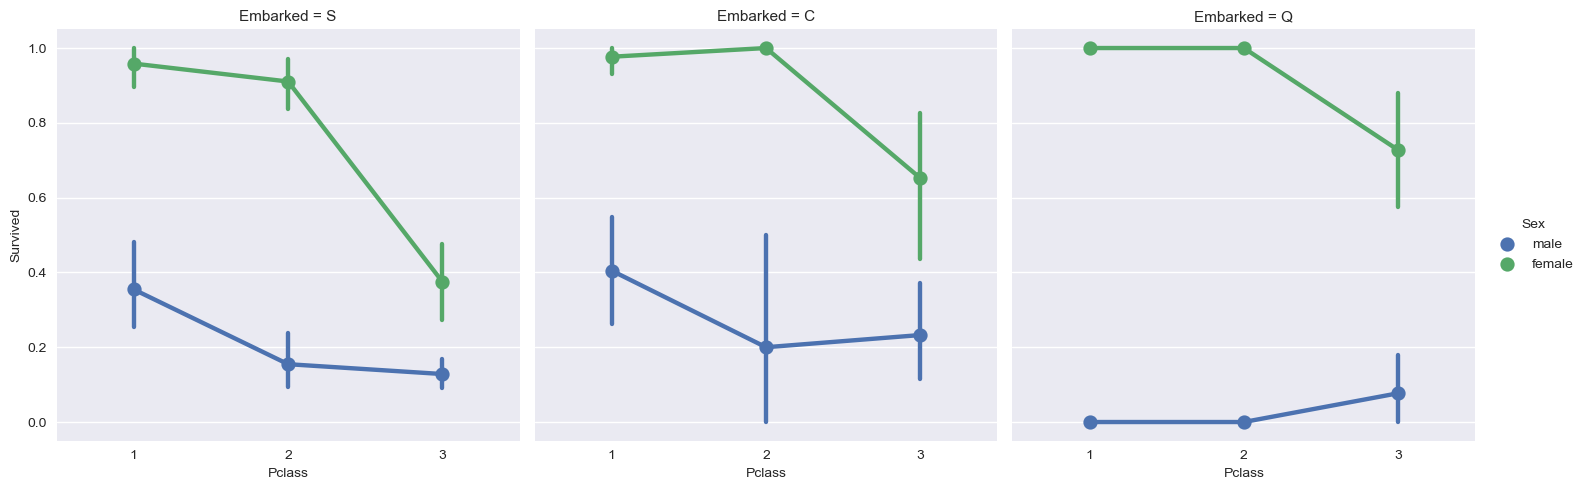

In [46]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked',kind = 'point' ,data=data)
plt.show()

In [48]:
data['Embarked'].fillna('S', inplace=True)
data.Embarked.isnull().any()

False

In [49]:
pd.crosstab(data.SibSp, data.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Text(0.5, 1.0, 'SibSp vs Survived')

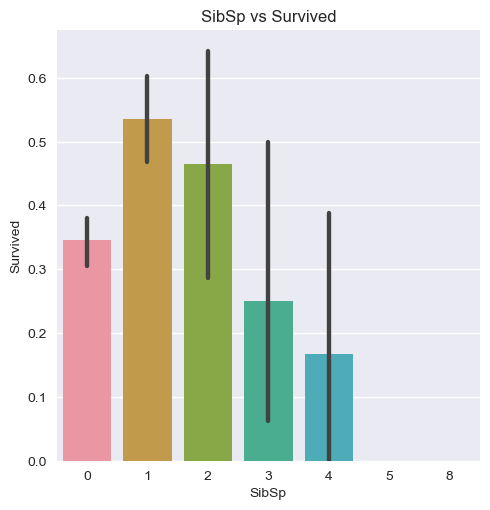

In [51]:
sns.catplot(x ="SibSp", y ="Survived",data=data, kind="bar")
plt.title("SibSp vs Survived")

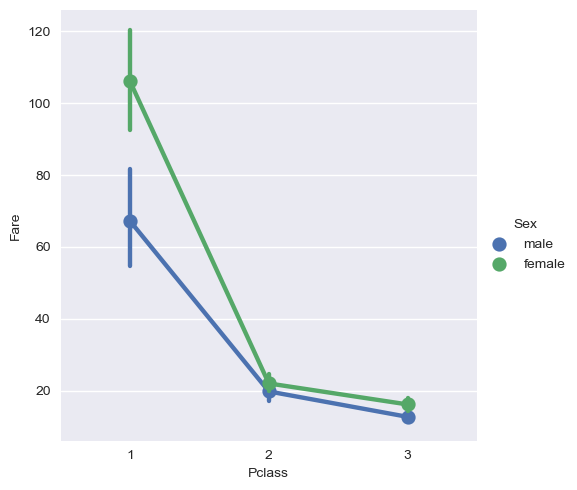

In [53]:
sns.catplot(x='Pclass', y='Fare', hue='Sex',kind = 'point', data=data)

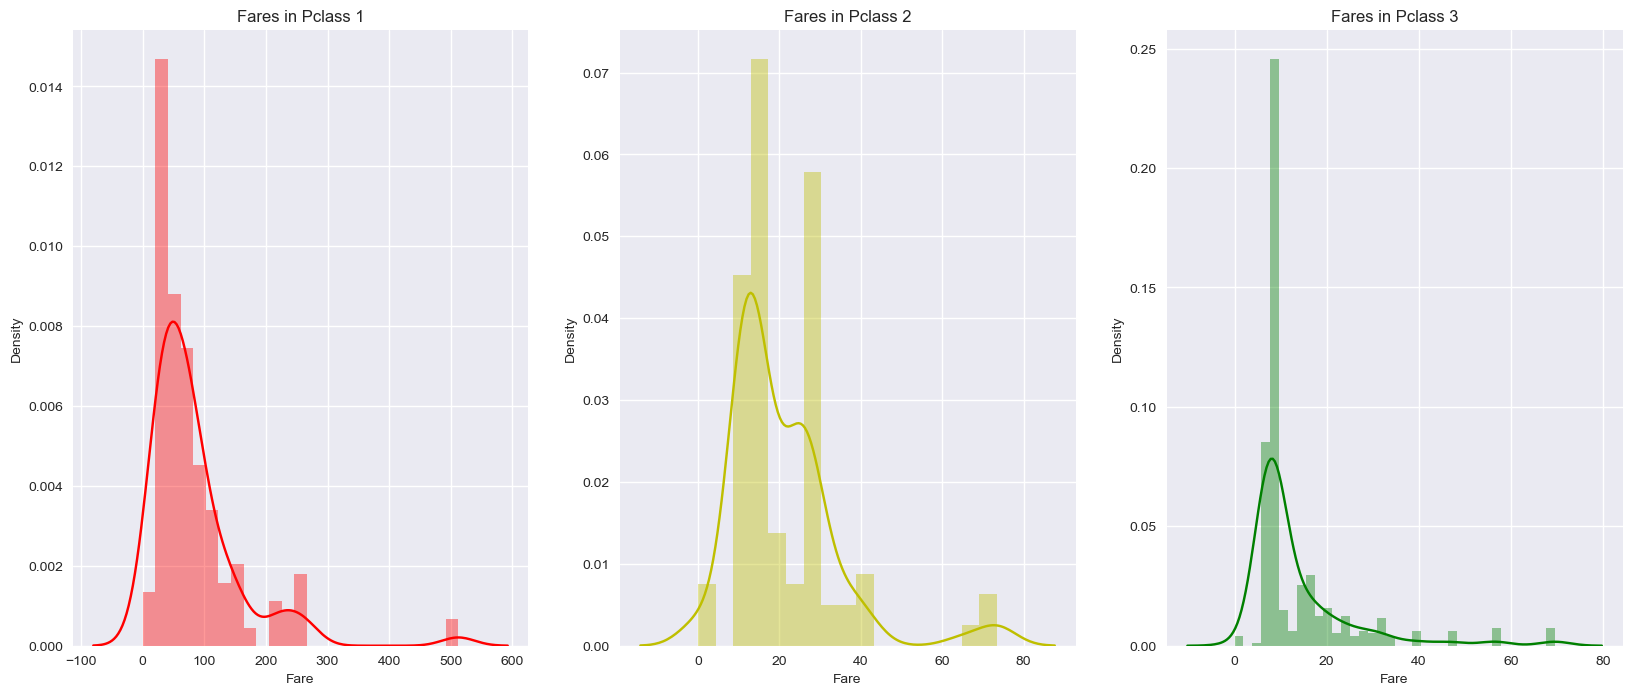

In [54]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# dist plot

sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0], color='r')
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1], color='y')
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2], color='g')
ax[2].set_title('Fares in Pclass 3')

plt.show()

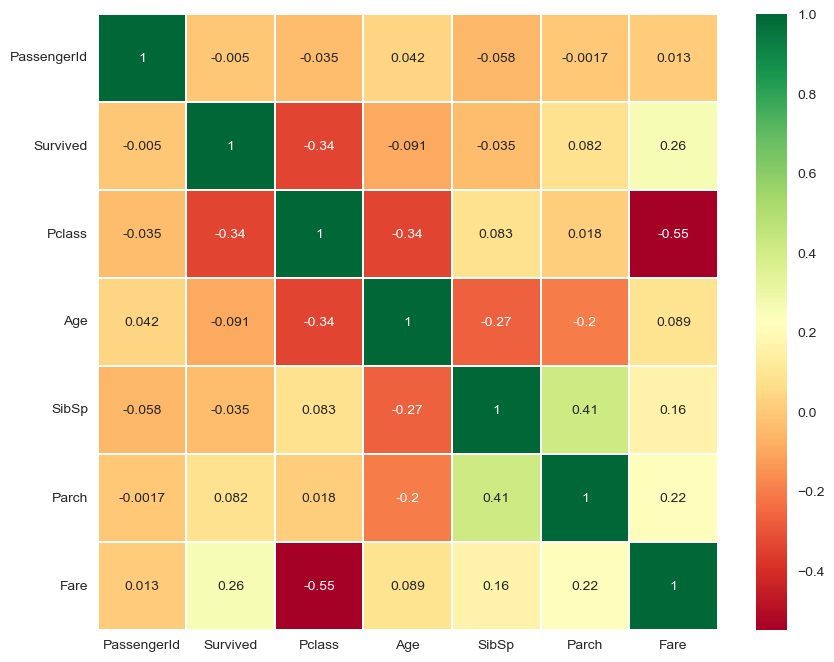

In [57]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# 데이터 가공

## Age_band(연속형 변수 -> 범주형 변수(Binning))

In [58]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [59]:
data["Age_band"].value_counts().to_frame()

,Age_band
1,382
2,325
0,104
3,69
4,11


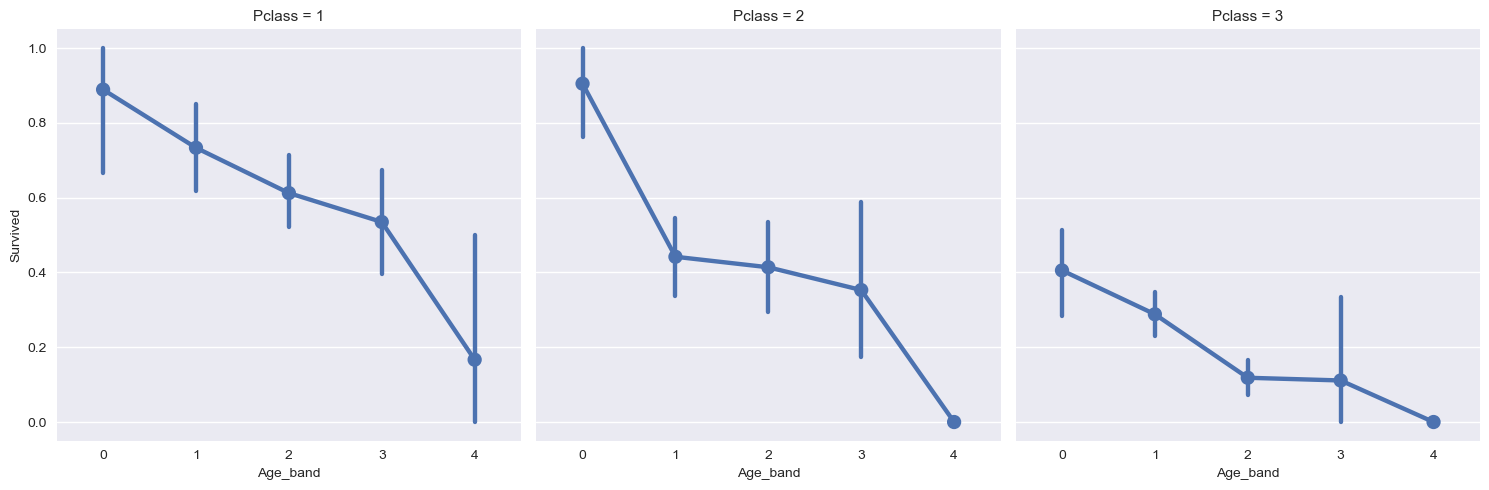

In [60]:
sns.catplot(x = 'Age_band', y='Survived', data=data,kind = 'point', col='Pclass')
plt.show()

## 두 변수 합쳐 새로운 변수 만들기

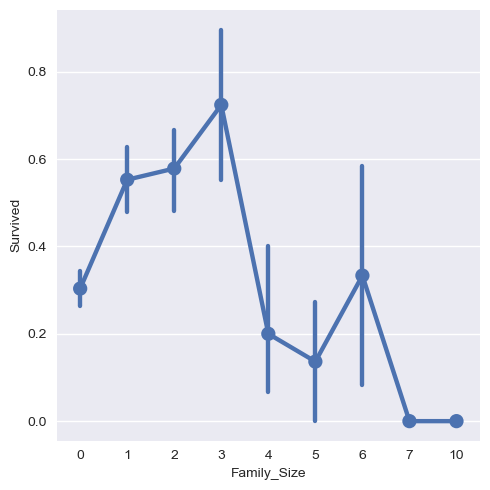

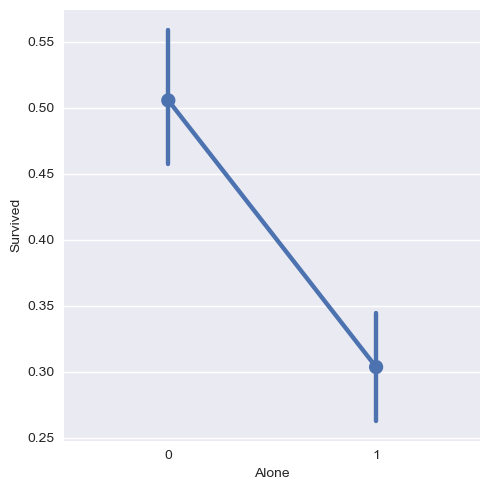

In [63]:
data["Family_Size"] = 0
data["Family_Size"] = data["Parch"] + data["SibSp"]
data["Alone"] = 0
data.loc[data.Family_Size ==0,"Alone"] =1

sns.catplot(x = 'Family_Size',y=  'Survived', data=data,kind = 'point', ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.catplot(x ='Alone', y= 'Survived', data=data,kind = 'point', ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

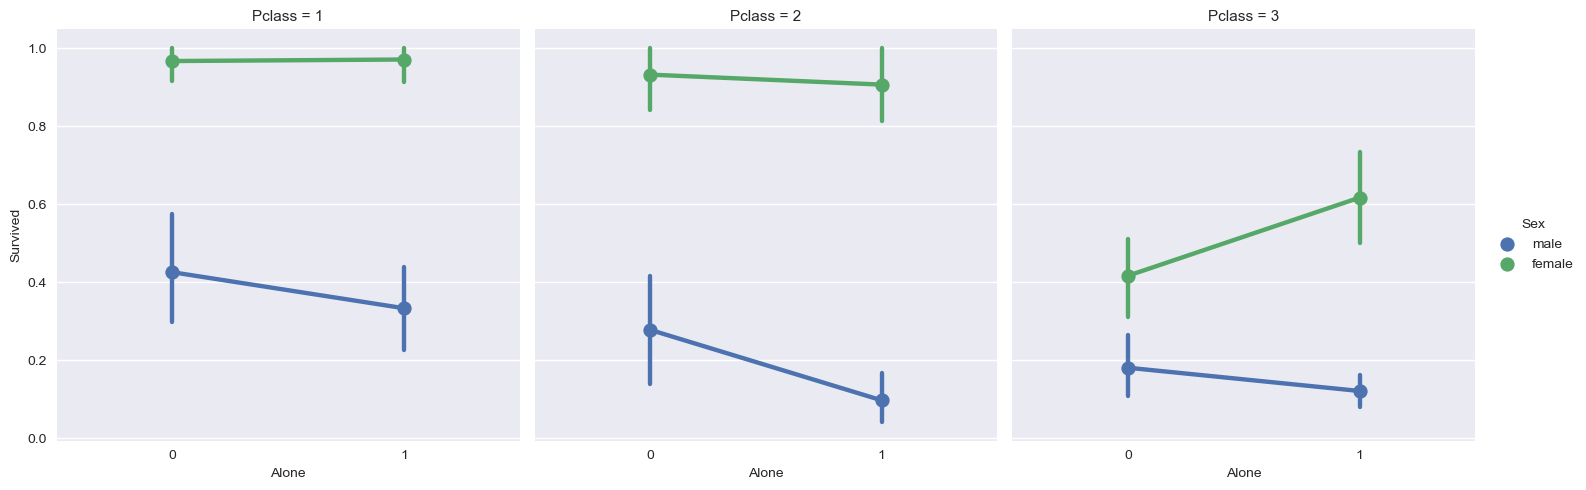

In [64]:
sns.catplot(x = 'Alone', y= 'Survived', data=data, hue='Sex',kind = 'point', col='Pclass')
plt.show()

## Fare_Range(연속형 변수 -> 범주형 변수(Binning), qcut활용)

In [65]:
data["Fare_Range"] = pd.qcut(data["Fare"], 4)
data.groupby(["Fare_Range"])["Survived"].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [67]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

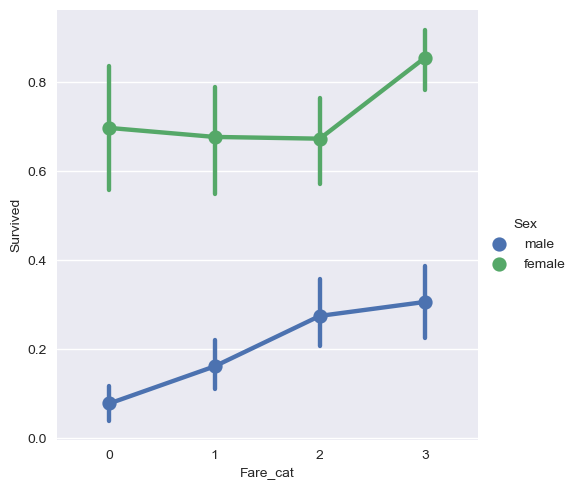

In [68]:
sns.catplot(x= 'Fare_cat', y='Survived', data=data,kind = 'point', hue='Sex')
plt.show()

## string을 numeric value로 변환

In [70]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'],
                        [0, 1, 2, 3, 4],
                        inplace=True)

## 불필요한 colum drop

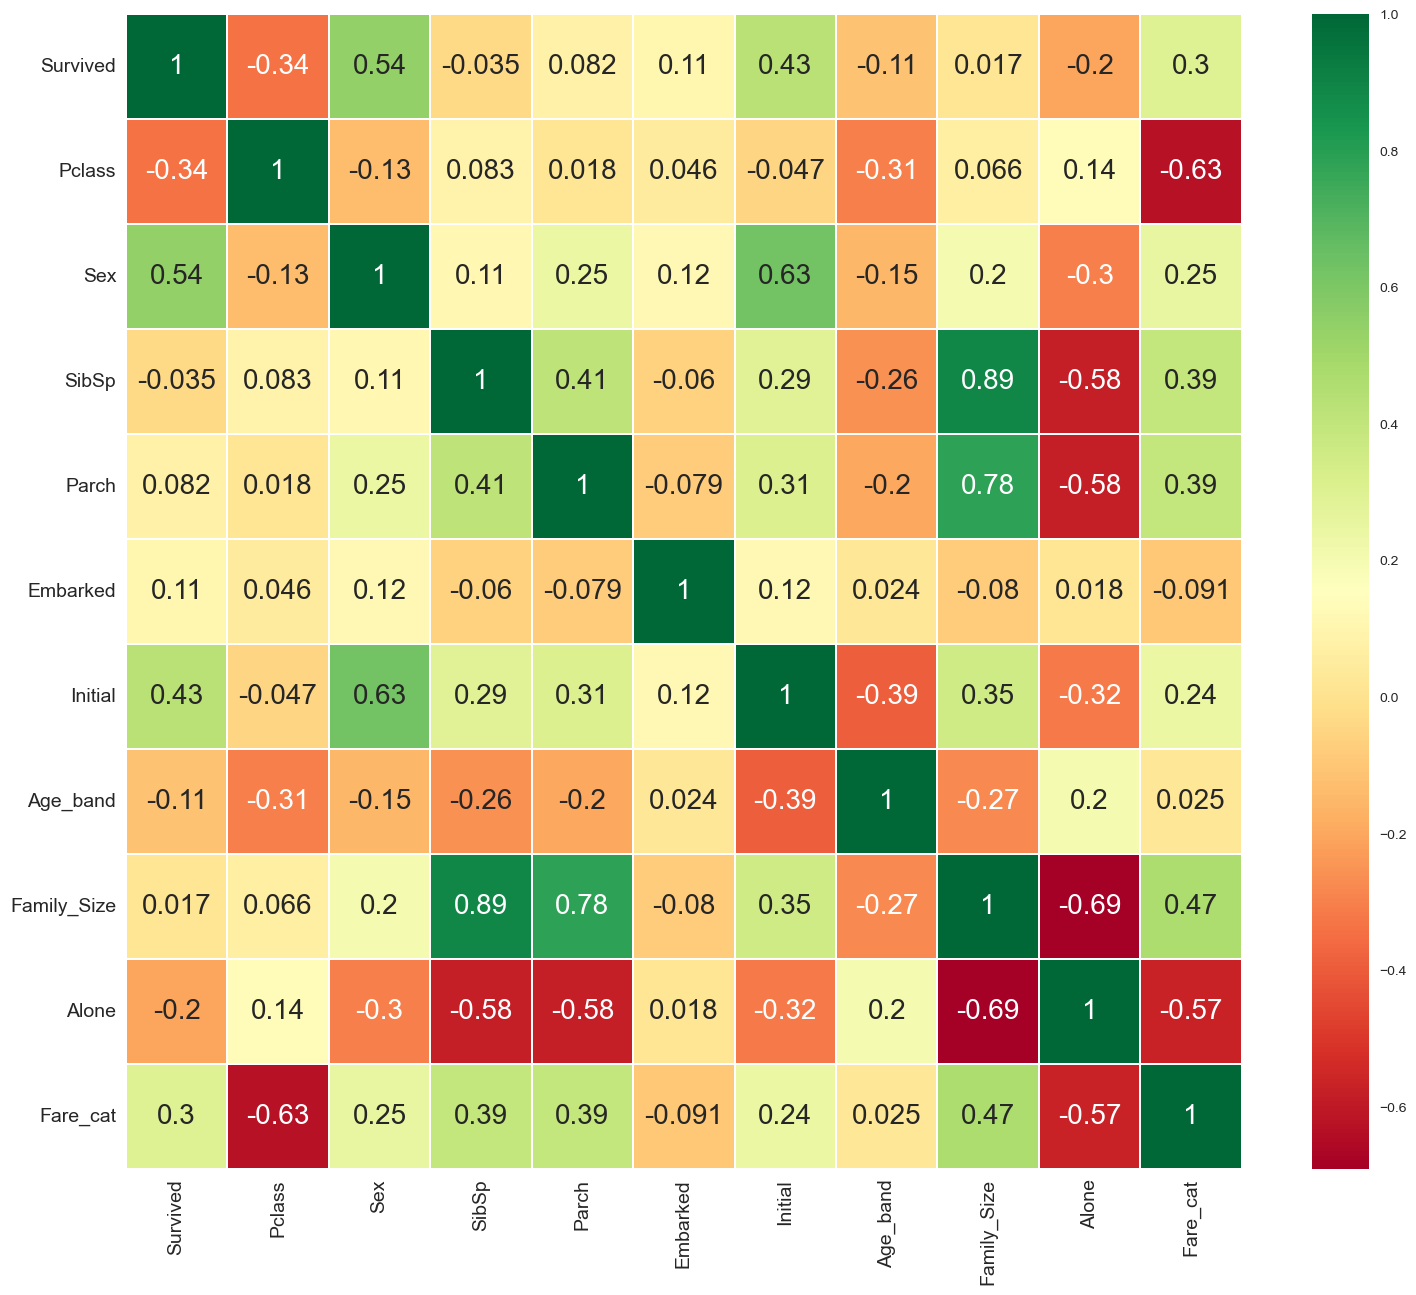

In [72]:
data.drop(
    ['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'],
    axis=1,
    inplace=True)
sns.heatmap(data.corr(),annot=True, cmap='RdYlGn', linewidths=0.2,annot_kws={'size': 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# 추가 학습 내용

In [73]:
df=pd.DataFrame(np.random.randn(10,4).cumsum(axis=0), columns=['A','B','C','D'], index=np.arange(0,100,10))
df

,A,B,C,D
0,1.038122,1.036062,-0.120431,0.328398
10,1.243648,0.183758,-0.690131,-1.755684
20,1.501360,-1.513692,1.325782,-2.296792
30,0.181917,-1.812668,1.571981,-1.674086
40,1.976754,-2.121451,2.691659,-1.096999
50,2.253752,-2.244267,2.909025,-1.138533
60,2.083192,-2.402237,2.436337,-3.015619
70,4.001716,-2.811698,3.801244,-2.736092
80,5.215845,-4.437514,3.247751,-1.248629
90,6.496436,-4.424765,4.106415,-2.302068


<Axes: >

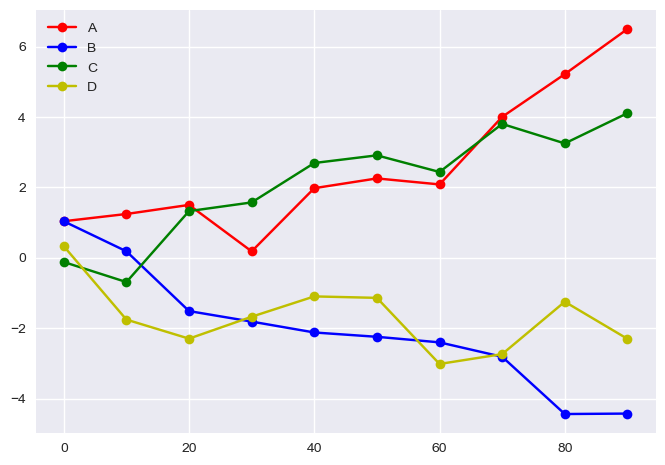

In [75]:
df.plot(marker = 'o', color=['r','b','g','y'])

In [77]:
iris  =sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


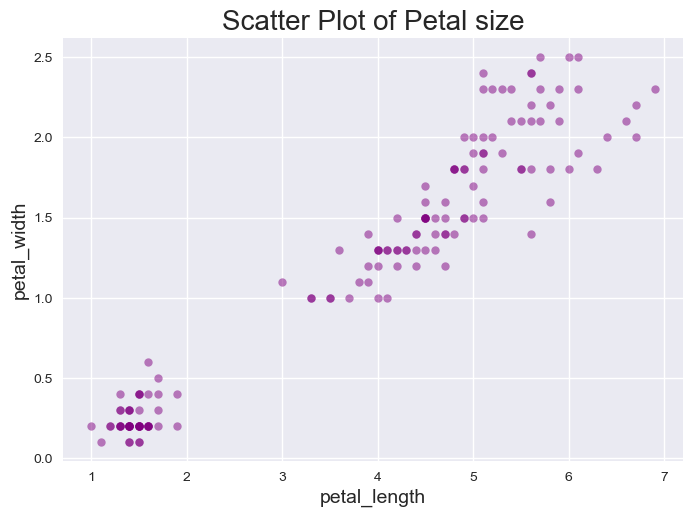

In [79]:
plt.plot('petal_length','petal_width', data=iris, linestyle='none', 
         marker='o', 
         markersize=6,
         color='purple', alpha = 0.5)
plt.title('Scatter Plot of Petal size', fontsize=20)
plt.xlabel('petal_length', fontsize=14)
plt.ylabel('petal_width', fontsize=14)
plt.show()

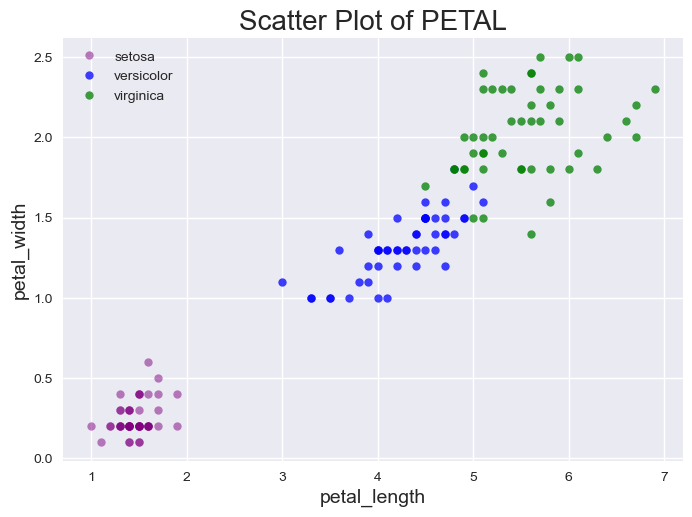

In [81]:
plt.plot('petal_length',"petal_width",data = iris[iris["species"] == 'setosa'],linestyle = 'none', marker = 'o', markersize =6, color ='purple',alpha = 0.5)
plt.plot('petal_length',  
         'petal_width',  
         data=iris[iris['species']=='versicolor'],
         linestyle='none', 
         marker='o', 
         markersize=6,
         color='blue', 
         alpha=0.75)
plt.plot('petal_length',  
         'petal_width',  
         data=iris[iris['species']=='virginica'],
         linestyle='none', 
         marker='o', 
         markersize=6,
         color='green', 
         alpha=0.75)
plt.title('Scatter Plot of PETAL', fontsize=20)
plt.xlabel('petal_length', fontsize=14)
plt.ylabel('petal_width', fontsize=14)
plt.legend(['setosa','versicolor', 'virginica'])
plt.show()